# Credit Card Fraud Detection

Objective
Predict whether a transaction is fraudulent based on features such as amount, category, customer age/gender/income, etc. The target variable is:

Fraud = 1 → fraudulent

Fraud = 0 → legitimate


Data Dictionary

Column Name	Description

TransactionID-	Unique ID for each transaction (integer)

TransactionAmount-	Amount in USD (float)

TransactionTime-	Time in hours since the first transaction (float)

MerchantCategory-	Merchant category (categorical: 'Retail', 'Online', 'Restaurant', 'Travel')

CustomerAge-	Age of customer (integer: 18–80)

CustomerGender-	Gender (categorical: 'Male', 'Female')

CustomerIncome-	Income in USD (integer: 20,000–200,000)

TransactionLocation-	Location of transaction (categorical: 'Urban', 'Suburban', 'Rural')

PreviousFraudCount-	Past 6-month fraud count (integer: 0–5)

Fraud-	Target variable (binary: 1 = fraud, 0 = not fraud)



In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [51]:
df = pd.read_csv('credit_card_data.csv')

In [52]:
df

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,204,899.06,19.53,Online,73,Male,97475,Urban,0,1
1,267,698.53,9.41,Online,64,Female,181779,Rural,5,1
2,153,149.17,10.18,Restaurant,24,Male,67638,Urban,3,1
3,10,709.53,6.50,Retail,32,Male,180701,Urban,3,0
4,234,495.06,13.33,Travel,25,Female,72930,Rural,1,1
...,...,...,...,...,...,...,...,...,...,...
295,189,532.00,22.81,Restaurant,71,Female,196611,Suburban,3,1
296,72,202.72,0.44,Online,55,Female,193946,Suburban,4,0
297,107,413.33,9.34,Travel,26,Female,53742,Rural,5,1
298,271,810.31,12.34,Retail,50,Female,156727,Suburban,4,1


# Essential Exploritory Data Analysis (EDA)

In [53]:
df.describe()

,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,497.728367,12.260100,49.466667,113662.533333,2.540000,0.703333
std,86.746758,292.868780,7.261983,18.055161,51746.345767,1.702369,0.457552
min,1.000000,10.040000,0.260000,18.000000,20526.000000,0.000000,0.000000
25%,75.750000,242.882500,5.995000,35.000000,68614.750000,1.000000,0.000000
50%,150.500000,514.160000,12.520000,49.000000,109308.500000,3.000000,1.000000
75%,225.250000,758.072500,18.562500,66.000000,159984.250000,4.000000,1.000000
max,300.000000,990.100000,23.990000,80.000000,199917.000000,5.000000,1.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        300 non-null    int64  
 1   TransactionAmount    300 non-null    float64
 2   TransactionTime      300 non-null    float64
 3   MerchantCategory     300 non-null    object 
 4   CustomerAge          300 non-null    int64  
 5   CustomerGender       300 non-null    object 
 6   CustomerIncome       300 non-null    int64  
 7   TransactionLocation  300 non-null    object 
 8   PreviousFraudCount   300 non-null    int64  
 9   Fraud                300 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 23.6+ KB


In [55]:
df.isnull().sum()

TransactionID          0
TransactionAmount      0
TransactionTime        0
MerchantCategory       0
CustomerAge            0
CustomerGender         0
CustomerIncome         0
TransactionLocation    0
PreviousFraudCount     0
Fraud                  0
dtype: int64

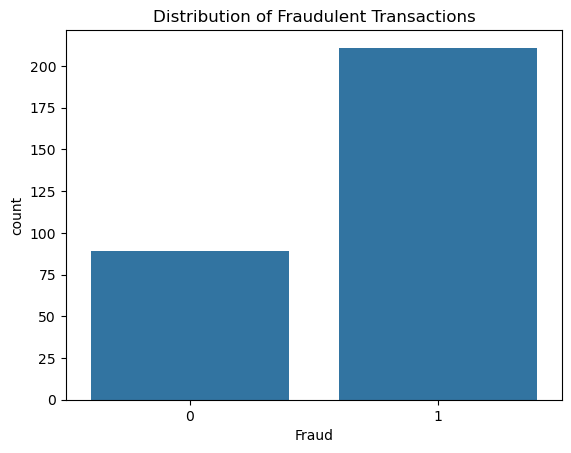

In [56]:
# Distribution of target variable
sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

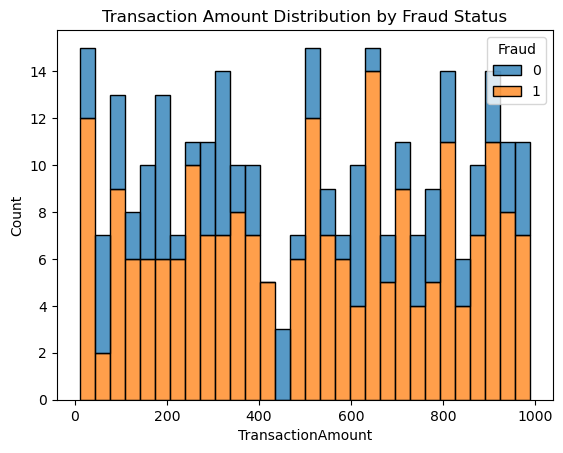

In [57]:
# Distribution of Transaction Amount by Fraud status
sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack', bins=30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()


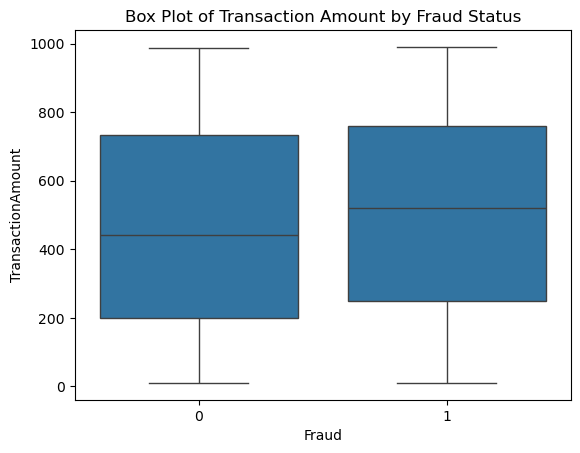

In [58]:
# Box plot for Transaction Amount by Fraud status
sns.boxplot(x='Fraud', y='TransactionAmount', data=df)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.show()


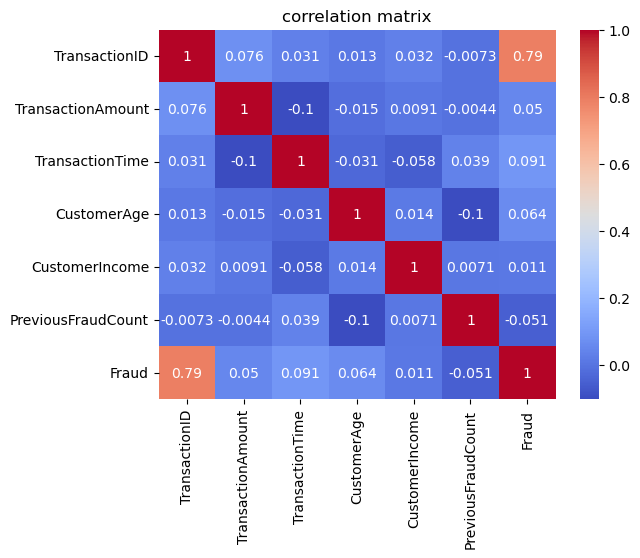

In [59]:
# Correlation matrix
num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)

correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

# Data Processing with Logistic Regression

In [60]:
# Encode categorical variables
label_encoders = {}

for column in ['MerchantCategory', 'CustomerGender', 'TransactionLocation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [61]:
# Features and target
X = df.drop(['TransactionID', 'Fraud'], axis=1)  # Feature set (drop ID and target)
y = df['Fraud']  # Target variable


In [62]:
X.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,899.06,19.53,0,73,1,97475,2,0
1,698.53,9.41,0,64,0,181779,0,5
2,149.17,10.18,1,24,1,67638,2,3
3,709.53,6.50,2,32,1,180701,2,3
4,495.06,13.33,3,25,0,72930,0,1


In [63]:
# Step 1: Import SMOTE
from imblearn.over_sampling import SMOTE

# Step 2: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [64]:

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Fraud
1    145
0     65
Name: count, dtype: int64
After SMOTE: Fraud
1    145
0    145
Name: count, dtype: int64


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(class_weight='balanced', C=0.3, max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)


LogisticRegression(C=0.3, class_weight='balanced', max_iter=1000)

In [66]:
# Step 4: Predict on test set
logreg_pred = logreg.predict(X_test)

# Step 5: Evaluate
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Logistic Regression Accuracy (SMOTE): {logreg_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, logreg_pred))

Logistic Regression Accuracy (SMOTE): 61.11%

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.54      0.43        24
           1       0.79      0.64      0.71        66

    accuracy                           0.61        90
   macro avg       0.57      0.59      0.57        90
weighted avg       0.67      0.61      0.63        90



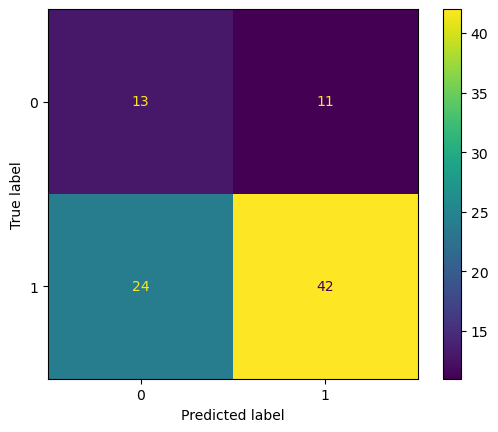

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')


# Data Processing with Random Forest

In [68]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
# Step 1: Apply SMOTE to training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight='balanced_subsample',
    random_state=42
)

In [69]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

In [70]:
# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

rf_accuracy = accuracy_score(y_test, rf_pred)

In [71]:
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 63.33%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        24
           1       0.73      0.79      0.76        66

    accuracy                           0.63        90
   macro avg       0.50      0.50      0.50        90
weighted avg       0.61      0.63      0.62        90



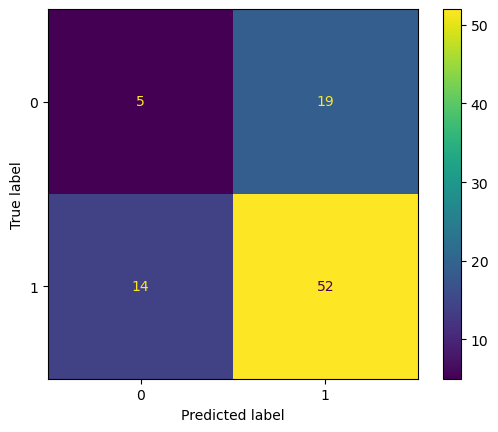

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="viridis")


# Plot Model Comparison: Logistic Regression vs Random Forest

In [74]:
import matplotlib.pyplot as plt

# Accuracy scores (you can also use F1-scores if preferred)
models = ['Logistic Regression', 'Random Forest']
accuracy_scores = [logreg_accuracy * 100, rf_accuracy * 100]


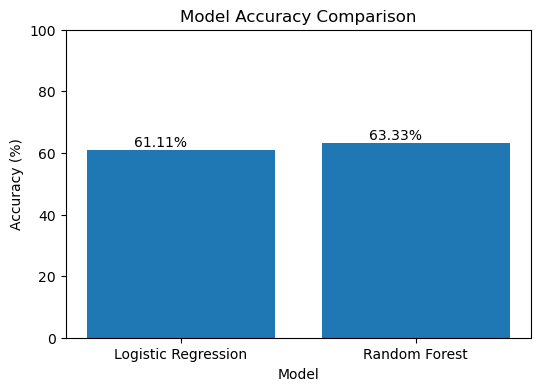

In [76]:
# Bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracy_scores)
plt.ylim(0, 100)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0 - 0.2, yval + 1, f'{yval:.2f}%')

plt.show()

## 📌 Final Conclusion

🔍 **Which Model Performed Better?**  
Random Forest outperformed Logistic Regression with an accuracy of **63.33%** compared to **61.11%** for Logistic Regression.

---

🧠 **Why Random Forest Worked Better:**
- Handles **non-linear relationships** better.
- Performs well on **imbalanced data**, especially with `class_weight='balanced_subsample'`.
- Random Forest is an **ensemble method**, combining multiple decision trees, which improves stability and accuracy.

---

📈 **What Can Be Improved:**
- Add more data to improve generalization and reduce overfitting.
- Engineer additional features from time, location, or customer history.
- Try other powerful classifiers like **XGBoost**, **LightGBM**, or **Neural Networks**.
- Perform cross-validation for better model robustness.

---

✅ Overall, this project demonstrates strong understanding of data preprocessing, class imbalance handling with SMOTE, model training, and evaluation with visualizations.
